Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2870 - accuracy: 0.9168 - val_loss: 0.1548 - val_accuracy: 0.9563
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1261 - accuracy: 0.9624 - val_loss: 0.1124 - val_accuracy: 0.9652
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0923 - accuracy: 0.9722 - val_loss: 0.0938 - val_accuracy: 0.9714
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0739 - accuracy: 0.9766 - val_loss: 0.0993 - val_accuracy: 0.9691
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0597 - accuracy: 0.9813 - val_loss: 0.0842 - val_accuracy: 0.9741
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0512 - accuracy: 0.9838 - val_loss: 0.0802 - val_accuracy: 0.9760
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0431 - accuracy: 0.9864 - val_loss: 0.0793 - val_accuracy:

Text(0.5, 1.0, 'Finding the best learning rate')

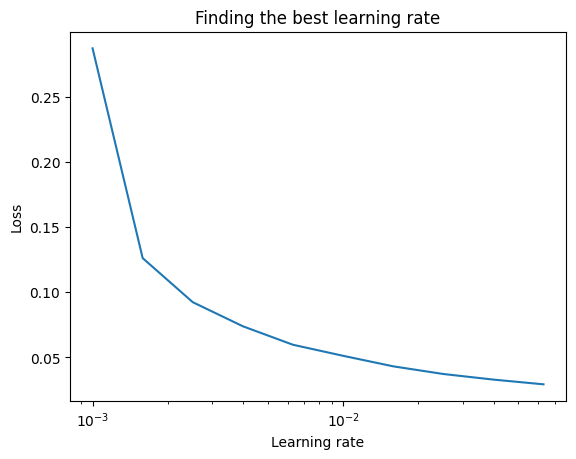

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import LearningRateScheduler
import math
import pandas as pd

# * Дані, які вже відсортовані на навчальні та тестові набори
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# * Розділення даних на тестові та тренувальні
train_data = train_data / 255.0
test_data = test_data / 255.0


# * Створення моделі
tf.random.set_seed(56)
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(64, activation="relu"),
  Dense(32, activation="relu"),
  Dense(10, activation="softmax")
])


# * Навчання моделі
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(lr=0.1),
                 metrics=["accuracy"])

history = model.fit(train_data,
                    train_labels,
                    epochs=10,
                    validation_data=(test_data, test_labels))
# * Побудова кривої спадання швидкості навчання
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(10)/5))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the best learning rate")

313/313 [==============================] - 1s 3ms/step - loss: 0.0973 - accuracy: 0.9738
Test accuracy: 0.973800003528595
313/313 [==============================] - 1s 2ms/step


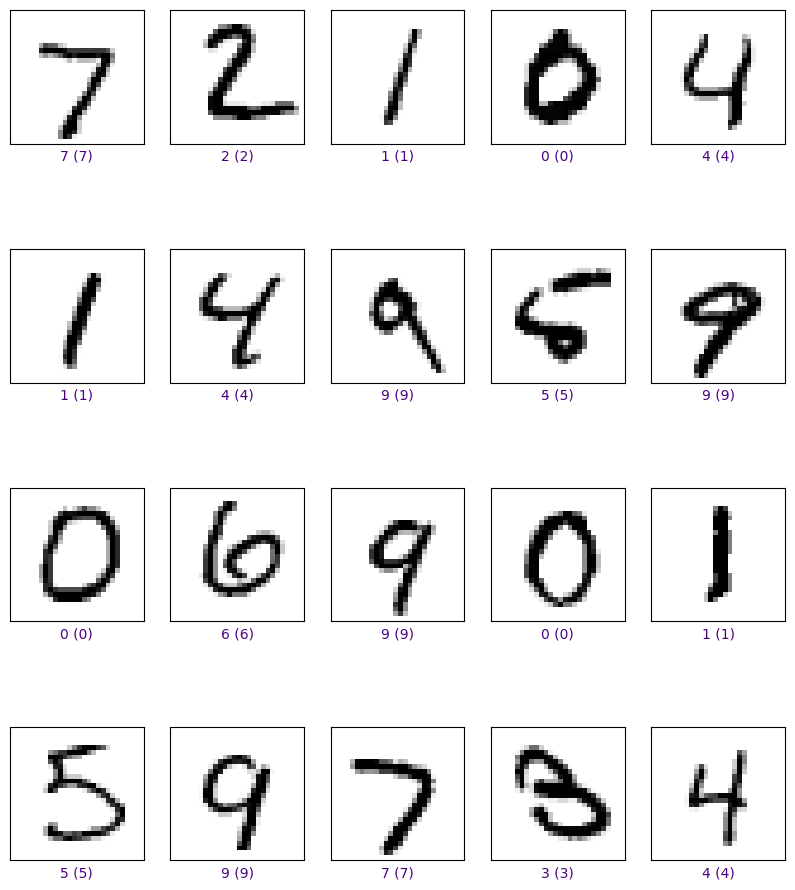

In [8]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {test_acc}')

predictions = model.predict(test_data)

# * Візуалізація перших 20 тестових зображень
num_rows = (10 // 5) + 1
plt.figure(figsize=(10, 3 * num_rows))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.imshow(test_data[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    predicted_label = tf.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'indigo'
    else:
        color = 'deeppink'
    plt.xlabel(f'{predicted_label} ({true_label})', color=color)
plt.show()
